# 1. Motivation for Dimensionality Reduction

- We assume that every dataset has some underlying structure
- The structure may not depend on every parameter in the data
- It should therefore be possible to represent _almost all_ the data using less information (fewer parameters/dimensions)
- Dimensionality reduction is therefore useful for:
    - Using three or less dimensions to represent higher dimnesional data is useful for __visualising__ the data
    - The new dimensions should only include the actual patterns in the data and __remove any noise__ or redundancy
    - Used as __preporocessing__ for regression or classification algorithms which generally work better on lower dimensional data


# 2. Linear Dimensionality Reduction Techniques

There are two that we were exposed to (as far as i could tell):
1. PCA
2. Linear Discriminant Analysis

## 2.1. Principal Component Analysis

Some links:

- __Brilliant link:__ [Explaining why the covariance matrix can be used for principal component analysis](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

- [Colab Notebook](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) on PCA

- Where Mishra got his [kernel PCA code](https://sebastianraschka.com/Articles/2014_kernel_pca.html) from. It speaks about how PCA only works to classify data that is linearly seperable

- Step by step [PCA in python](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)

In the case where your data has many independant variables, PCA is a technique that allows one to see which __linear combination__ of these variables matter the most in differentiating (or even representing) the data.

One way to find the PCA is using the _eigenvectors_ and the _eigenvalues_ of the __covariance matrix__ $XX^T$. 

### Covariance Matrix

The covariance between two variables for $n$ data points is found using:

$$
\sigma_{xy} = \sigma(x,y) = \frac{1}{n-1} \sum_{i = 1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

The covariance matrix is a matrix which consists of all possible variances along each dimension, and all covariances between the dimensions in the data. For the example of a two variable/feature/dimension dataset:

$$
\begin{bmatrix}
variance(x) & covariance(x,y) \\
covariance(y,x)& variance(y)
\end{bmatrix}
 =
\begin{bmatrix}
\sigma_{x}^2 & \sigma_{xy} \\
    \sigma_{yx} & \sigma_{y}^2
\end{bmatrix}
$$

[Video that has a good graphical representation of covariance and PCA](https://www.youtube.com/watch?v=g-Hb26agBFg)

Consider a matrix $X$ which is $n\times m$. Where 

1. $n$ is the number of features/variables measured (the dimension of each datapoint)
2. $m$ is the number of samples or data points present

Assuming that the means have already been subtracted from each row (the mean for each feature is removed to center the data), the covariance matrix of $X$ is:

$$C = \frac{XX^T}{n-1}$$

In [5]:
import numpy as np

# Define some data matrix which has 3 features and 5 samples
X = np.array([[64,   580, 29],
     [66,   570, 33],
     [68,   590, 37],
     [69,   660, 46],
     [73,   600, 55] ]).T

print('The correct covariance matrix is: \n{}'.format(np.cov(X)))

The correct covariance matrix is: 
[[  11.5    50.     34.75]
 [  50.   1250.    205.  ]
 [  34.75  205.    110.  ]]


In [88]:
# Try do it myself
num_samples = np.shape(X)[1];
num_features = np.shape(X)[0];
print('Number of samples: {}'.format(num_samples))
print('Number of variables per sample: {}'.format(num_features))

x = np.zeros(np.shape(X))

# Remove the mean from each feature row
for i in range (0,num_features):
    x[i,:] = X[i,:] - np.sum(X[i,:])/num_samples

# Find the unbiased estimate of the covariance matrix
Cov = np.dot(x,x.T)/(num_samples -1)
print(Cov)

Number of samples: 5
Number of variables per sample: 3
[[  11.5    50.     34.75]
 [  50.   1250.    205.  ]
 [  34.75  205.    110.  ]]


### Using the covariance matrix to find PCA

Using covariance matrix to find PCS not difficult to do since $C$ is always square and symmetrical (because $XX^T$ is alwasy square and symmetrical). A symmetrical matrix can always be diagonalised. The diagonal form reveals the eigenvectors and eigenvalues: 

$$
C = WDW^T
$$

- $W \to$ is a matrix of the eigenvectors/ principal components. Each of the eigenvectors is orthogonal and represets a new coordinate system that the data can be projected onto. The idea is that transforming the data ont this new coordinate system allows the data to be differentiated most easily. The eigenvector whos projection has the highest variance is the first principal component. This can be defined as a charachteristic of the data. This charachteristic of the data is the best at differentiating the data.
- $D \to$ is a diagonal matrix with the singular values (eigenvalues). The eigenvalues represent the amount of variance that exists along each of the new principal components/eigen vectors. Therefore the highest eigenvalue, corresponds to the first principal component. 

### An Example

![PCA of wines](Figures/pca.gif)

- Consider trying to best differentiate two wines (blue dots in Figure)
- Use the wines darkness (x-axis) and the wines alcohol level (y-axis). Each blue dot is a wine plotted using these two variables as a coordinate system.
- Now there is likely a better feature (or features) that can be used to differentiate these two wines
    - This feature can be found as a linear combination of the two original features
    
    - This feature should be represented as a line which we can project the data onto, which will result in the greatest variance. More variance means easier differentiability of the data. 
- So how to find this new coordinate system (a principal component) to project onto ?
    1. Find the covariance matrix
    
    $
    C = 
    \begin{bmatrix}
    1.07 & 0.63\\
    0.63 & 0.64
    \end{bmatrix}
    $
    
    - Notice that the covariance between $x$ and $y$ axes is represented twice in the two corners ($\sigma_{xy} = \sigma_{yx}$). This demonstrates the symmetry of the covariance matrix. Now one needs to find the eigenvector and the eigenvalue of the covariance matrix to find trends in the data. This is done using diagonalisation:
    - Diagonalising $C$ yeilds:
    
    $
    WDW^T = W
    \begin{bmatrix}
    1.52 & 0\\
        0& 0.19
    \end{bmatrix}
    W
    $
    
    - The diagonal matrix represents a new covariance matrix which shows variance in the new coordinate system. Since the eigenvectors are orthogonal, there is no covariance between them (therefore the zeroes off the main diagonal). The largest eigenvalue corresponds to the eigenvector which results in the highest variance (when the data is transformed onto its coordinate system). 
    - The first principal component is the eigenvector which results in the highest variance. This can be seen as the magenta line in the figure below. The highest variance of the projected red dots is found when the black line lines up with the magenta ticks. 
    - Notice that the magenta line is simply a linear combination of the original axes: $w_1x + w_2y$. Where $w_1, w_2$ make up the eigenvector.
    
- Now you have found a principle component. If you only use one principle component, you are using one dimension to represent you previously higher dimensioned data. In other words you project your data onto a single dimension which carries the most information for the data. For example if you had a dataset with many dimensions you could reduce it to being one dimensional by projecting the data onto the first principle component. Furthermore, using the first two principle components allows you to represent your data using the first two most important dimensions and so on.

### Some Graphics

![PCA data and eigenvalue](Figures/PCA_eg1_1.png)

Above, you can see the eigenvectors of the covariance matrix gven by $\Sigma$. The eigenvalues are the size of the directional eigenvectors. Clearly, the eigenvectors and values of the covariance matrix are summarising the data. 

![PCA data and eigenvalue](Figures/PCA_eg1_2.png)

In the image above, the 5 dimensional table has been reduced to a 2-dimensional table and plot using the first two PCs. This is clearly a good technique for visualising data. 

### Singular Value Decomposition

Although it is intuitive to use the covariance matrix to find the principal components, apparently one can loose information through the numerical calculation of $XX^T$. Therefore, another approach is to rather use Singular Value Decomposition (SVD). To find the PCA.

[Better Explanation of the intuitive relationship between SVD and PCA](https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca)

[Stack Exchange: Relationship between SVD and PCA](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca)

Recall that the covariance matrix: $C = \frac{XX^T}{n-1} = WDW^T$

Now, performing the SVD on data matrix X, splits it up into: $X = U\Sigma V^T$.

- $U \to$ this is made from the eigenvectors of $XX^T$. Therefore each column is orthogonal and has a magnitude of 1 (basis vectors)
- $V \to$ this is made from the eigenvectors of $X^TX$. Therefore each column also is orthogonal and has a magnitude of 1 




\begin{align}
\text{Since:}\quad & X = U\Sigma V^T\\
&XX^T = (U\Sigma V^T)(U\Sigma V^T)^T\\
&XX^T = (U\Sigma V^T)(V\Sigma U^T)\\
\text{And because:}\quad &V^TV = I, \\
\text{Therefore:}\quad &XX^T = U\Sigma^2 U^T
\end{align}

So this shows that:

$$
C = WDW^T = U\frac{\Sigma^2}{n-1}U^T
$$

Therefore:
1. The singular values squared and scaled are equal to the eigenvalues of the covariance matrix or 
$$ \lambda_i = \frac{{s_i}^2}{n-1} $$
2. The eigenvectors of the covariance matrix are the same as the left singular vectors of the SVD representation or
$$ W = U$$
3. Hence, one can use SVD to find all the matrices needed for PCA

## 2.2. Linear Discriminant Analysis (LDA)

[LDA](http://sebastianraschka.com/Articles/2014_python_lda.html)

PCA is good at reducing the number of dimensions for visualisation, but it cannot take data labels into account. Therefore it is not a good classification tool (cannot cluster specific classes). The goal of LDA is to project a dataset onto a lower-dimensional space with __good class-separability__

The general LDA approach is very similar to a Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA). PCA can be described as an “unsupervised” algorithm, since it “ignores” class labels and its goal is to find the directions (principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is “supervised” and computes the directions (linear discriminants) that will represent the axes that that maximize the separation between multiple classes.

# 3. Non Linear Dimensionality Reduction

When trying to create a classifier, you want the different classes to cluster together such that:
- the distance between points of the same class is minimised
- the distance between clusters is maximised
    
Often there is no linear function that can be drawn to seperate the classes - even if you project into a new cooridant system. Therefore it is not enough to just change the angle from which you are looking (normal PCA).

## 3.1. Kernel PCA

When the classes in the data are not linearly seperable, classical PCA fails. The soution is to place the data into a higher dimension to be able to linearly deperate it. The higher dimension is known as the feature space. The function used to map the data into a higher dimension is called a kernel. Usually for some data $X$, and some kernel $\phi$, this is represented as $$X \to \phi(X) $$

The kernel is a function that creates a non-linear combination of the original features. 

### Half Moon Classes

Consider the example of the half moons. These two classes (red and blue) canot be seperated linearly regardless of which angle you look at them from. So regular PCA cannot be used to classify these data points.

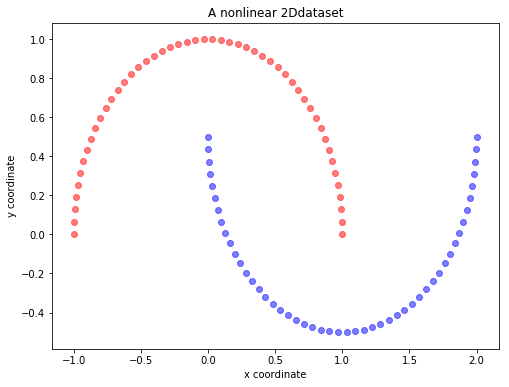

In [90]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

Now lets see what happens if we use normal (__linear__) PCA to try cluster the data. The first two principal components have been used:

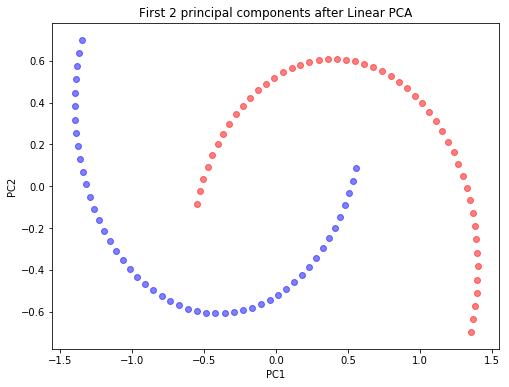

In [92]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)     # Create a PCA object with 2 PCs
X_spca = scikit_pca.fit_transform(X) # Fit/project the data onto the two PCs

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Clearly, linear PCA was not succesful is seperating these classes. So lets try with a kernel-PCA approach. The kernel used is the Gaussian radial basis function kernel (__rbf__). Note that $\gamma$ is a tuning variable which usually requires another algorithm/optimiser to determine for the particular dataset.

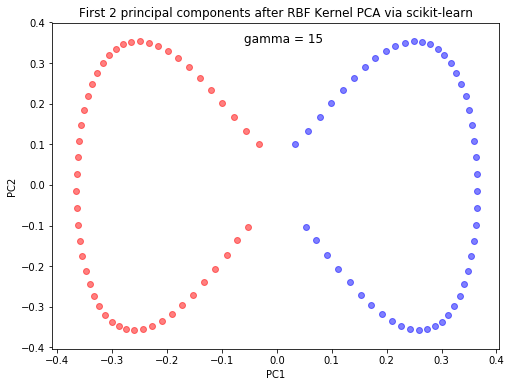

In [117]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.06, 0.35, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

So the RBF kernel is capable seperating the data. There are however many kernels that one can implement. The [sklearn Kernel PCA library](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) lists the available kernels as:

- “linear” (_default option_)
- “poly” 
- “rbf” 
- “sigmoid” 
- “cosine” 
- “precomputed”

For example, using the sigmoid kernel would look like this:

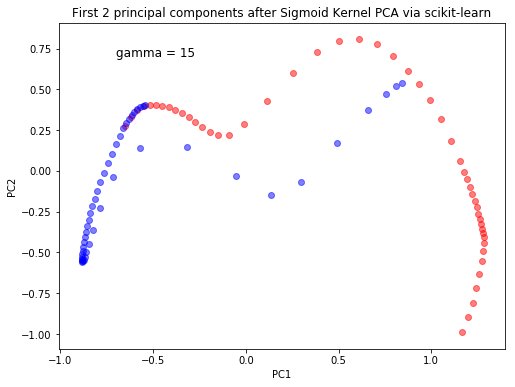

In [110]:
scikit_kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', alpha=0.5)

plt.text(-0.7, 0.7, 'gamma = 15', fontsize=12)
plt.title('First 2 principal components after Sigmoid Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 3.2. Locally Linear Embedding

This keeps the geometry of the data intact despite being non-linear. So for the example of the Swiss Roll, it is far better suited.

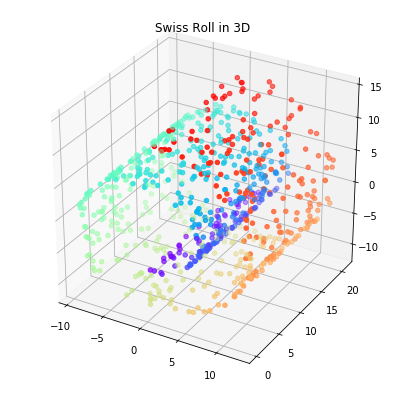

In [118]:
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

Below is an attempt using Kernel PCA with the Gaussian RBF kernel:

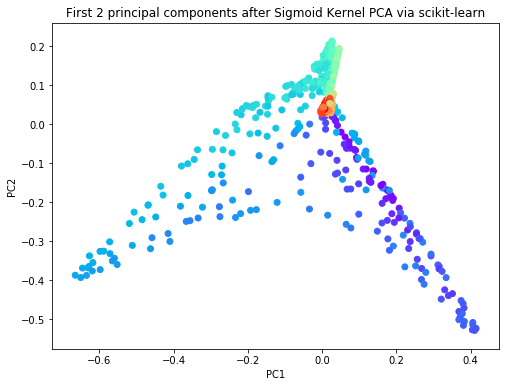

In [124]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_skernpca = scikit_kpca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[:, 0], X_skernpca[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Sigmoid Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

So the KernelPCA method did not work too well. However, using locally linear embedding  - which chooses a number of friends of each data point and then maintainf those friends in the lower dimension - better results are acheived:

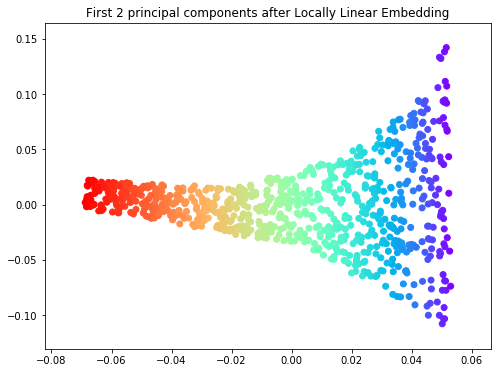

In [125]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

## 3.3. tSNE

[Mishras link](https://distill.pub/2016/misread-tsne/)